In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import glob
from PIL import Image
import cv2
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

Dataset taken from:
https://www.kaggle.com/ankitesh97/pokemon-images/version/1

In [20]:
width = 64
height = 64

path = 'pokemon'
files = [f for f in glob.glob(path + '/*.jpg')]
original = [f for f in files if 'flipped' not in f and 'rotated' not in f]
print(len(original))

dataset_size = len(original)

data = []
data_gray = []
edges = []

for file in original[:dataset_size]:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_CUBIC)
    data.append(resized)
    data_gray.append(cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY))
    edges.append(cv2.Canny(resized, width, height))
    
data = np.array(data)
data_gray = np.array(data_gray)
edges = np.array(edges)

print('data shape:', data.shape)
print('data_gray shape:', data_gray.shape)
print('edges shape:', edges.shape)

819
data shape: (819, 64, 64, 3)
data_gray shape: (819, 64, 64)
edges shape: (819, 64, 64)


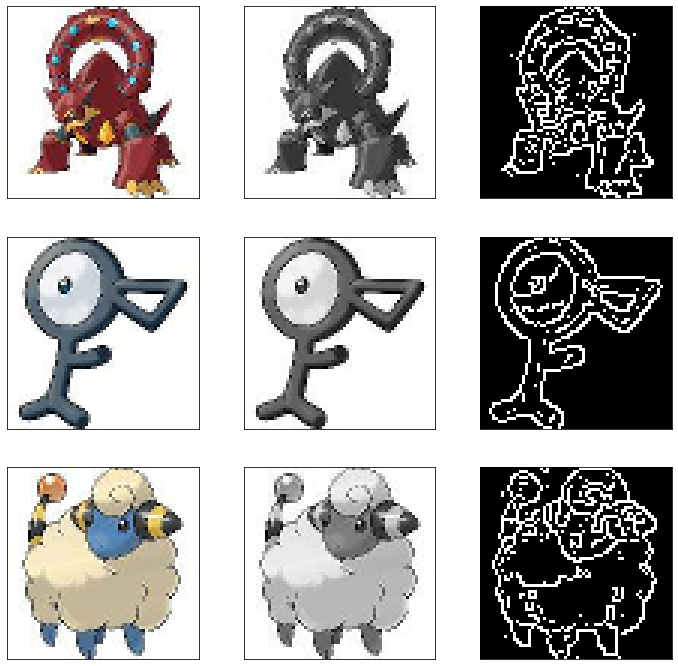

In [16]:
#plt.figure(figsize=(8, 12))
fig, axes = plt.subplots(3, 3)
fig.set_size_inches((12, 12))

for i in range(3):
    axes[i][0].imshow(data[i])
    axes[i][1].imshow(data_gray[i], cmap='gray')
    axes[i][2].imshow(edges[i], cmap='gray')
    
    axes[i][0].get_xaxis().set_visible(False)
    axes[i][0].get_yaxis().set_visible(False)
    axes[i][1].get_xaxis().set_visible(False)
    axes[i][1].get_yaxis().set_visible(False)
    axes[i][2].get_xaxis().set_visible(False)
    axes[i][2].get_yaxis().set_visible(False)
plt.show()

In [177]:
for i, name in enumerate(original):
    if '234.jpg' in name:
        print(i, name)

499 pokemon/234.jpg


In [54]:
def imscatter(x, y, images, zoom=1, cmap=None):
    
    ax = plt.gca()

    im = [OffsetImage(i, zoom=zoom, cmap=cmap) for i in images]
    x, y = np.atleast_1d(x, y)
    artists = []
    
    for x0, y0, i in zip(x, y, im):
        ab = AnnotationBbox(i, (x0, y0), xycoords='data', frameon=True)
        artists.append(ax.add_artist(ab))
        
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

In [42]:
def plot_random(x, y, images, n, zoom, cmap=None):
    size = len(images)
    
    indices = np.random.choice(np.arange(size), n, replace=False)
    x_sample = x[indices]
    y_sample = y[indices]
    img_sample = images[indices]
    
    return imscatter(x_sample, y_sample, img_sample, zoom=zoom, cmap=cmap)

AttributeError: 'list' object has no attribute 'canvas'

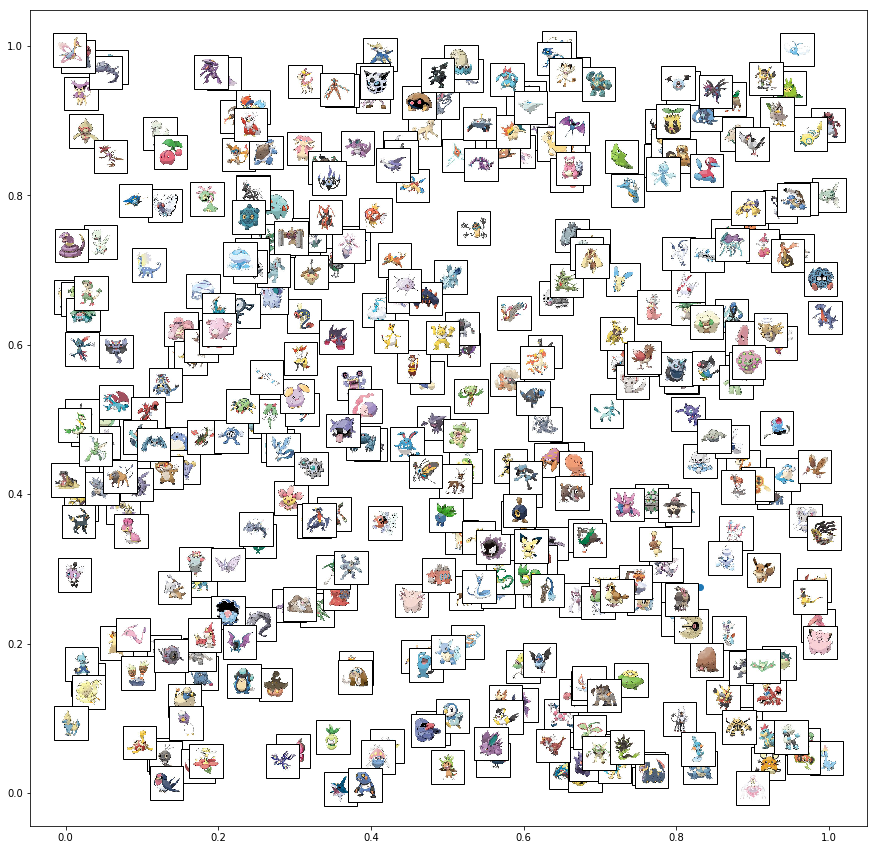

In [55]:
plt.figure(figsize=(15, 15))
fig = plot_random(
    np.random.rand(dataset_size),
    np.random.rand(dataset_size),
    data[:dataset_size],
    400,
    zoom=0.4)

In [25]:
flat_data = data.reshape(-1, width*height*3)
flat_gray = data_gray.reshape(-1, width*height)
flat_edges = edges.reshape(-1, width*height)

scaled_data = StandardScaler().fit_transform(flat_data)
scaled_gray = StandardScaler().fit_transform(flat_gray)
scaled_edges = StandardScaler().fit_transform(flat_edges)

/home/mateusz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/mateusz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/mateusz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/mateusz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/mateusz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with i

In [34]:
pca = PCA(n_components=2)
components1 = pca.fit_transform(scaled_data)
components2 = pca.fit_transform(scaled_gray)
components3 = pca.fit_transform(scaled_edges)
df1 = pd.DataFrame(data=components1)
df2 = pd.DataFrame(data=components2)
df3 = pd.DataFrame(data=components3)
dfs = [df1, df2, df3]

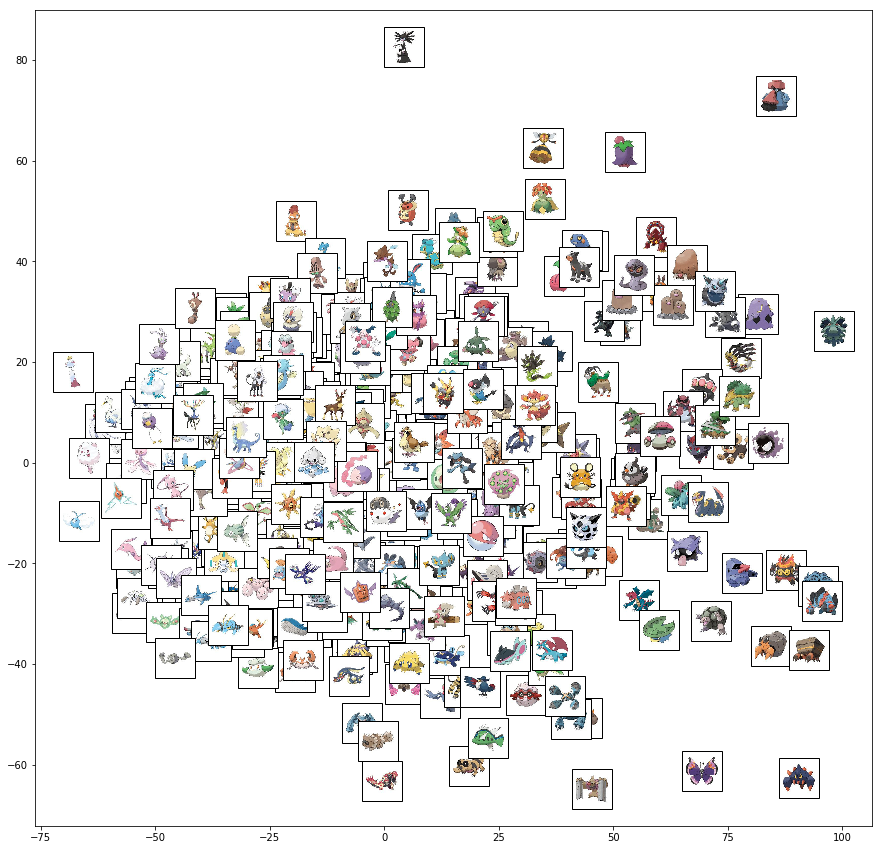

In [47]:
plt.figure(figsize=(15, 15))
fig = plot_random(
    dfs[0][0],
    dfs[0][1],
    data,
    500,
    zoom=0.5,
    cmap=None #'gray'
)

In [48]:
kpca = KernelPCA(n_components=2)
components1 = kpca.fit_transform(scaled_data)
components2 = kpca.fit_transform(scaled_gray)
components3 = kpca.fit_transform(scaled_edges)
df1 = pd.DataFrame(data=components1)
df2 = pd.DataFrame(data=components2)
df3 = pd.DataFrame(data=components3)
dfs = [df1, df2, df3]

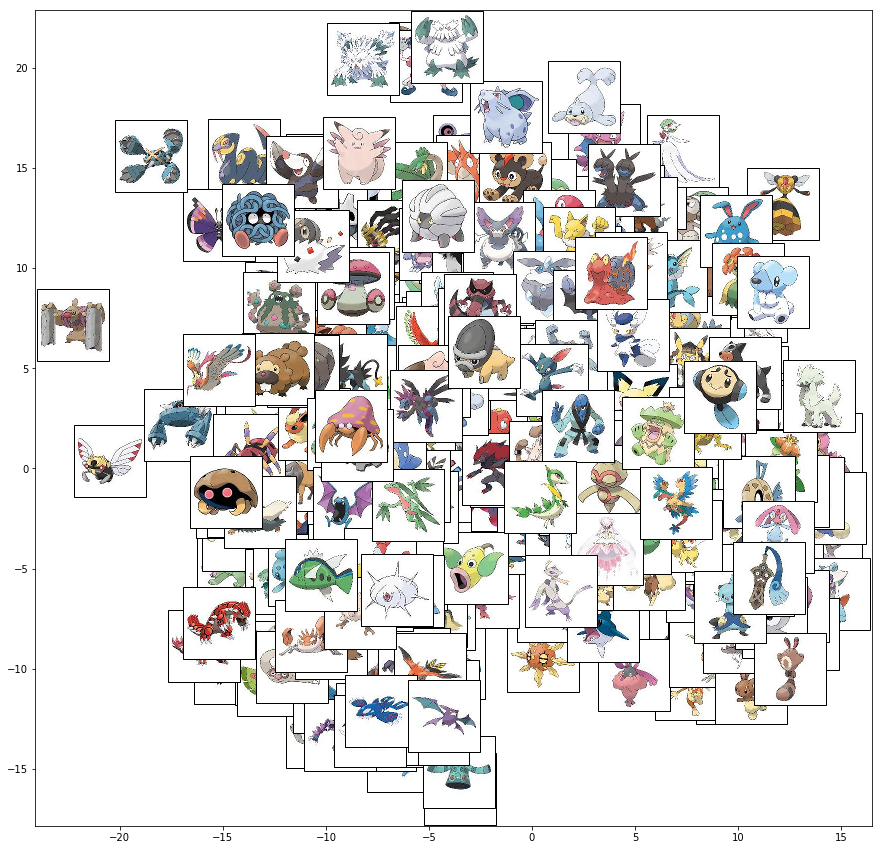

In [52]:
plt.figure(figsize=(15, 15))
fig = plot_random(
    dfs[2][0],
    dfs[2][1],
    data,
    500,
    zoom=1,
    cmap=None #'gray'
)

In [60]:
# Generate data x, y for scatter and an array of images.
def hoverplot(x, y, images, zoom=1, cmap=None):

    arr = images

    # create figure and plot scatter
    fig = plt.figure()
    ax = fig.add_subplot(111)
    line, = ax.plot(x, y, ls="", marker="o")

    # create the annotations box
    im = OffsetImage(arr[0], zoom=zoom)
    xybox=(50., 50.)
    ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
            boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
    # add it to the axes and make it invisible
    ax.add_artist(ab)
    ab.set_visible(False)

    def hover(event):
        # if the mouse is over the scatter points
        if line.contains(event)[0]:
            # find out the index within the array from the event
            ind, = line.contains(event)[1]["ind"]
            # get the figure size
            w,h = fig.get_size_inches()*fig.dpi
            ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
            hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
            # if event occurs in the top or right quadrant of the figure,
            # change the annotation box position relative to mouse.
            ab.xybox = (xybox[0]*ws, xybox[1]*hs)
            # make annotation box visible
            ab.set_visible(True)
            # place it at the position of the hovered scatter point
            ab.xy =(x[ind], y[ind])
            # set the image corresponding to that point
            im.set_data(arr[ind,:,:])
        else:
            #if the mouse is not over a scatter point
            ab.set_visible(False)
        fig.canvas.draw_idle()

    # add callback for mouse moves
    fig.canvas.mpl_connect('motion_notify_event', hover)           
    plt.show()

<IPython.core.display.Javascript object>


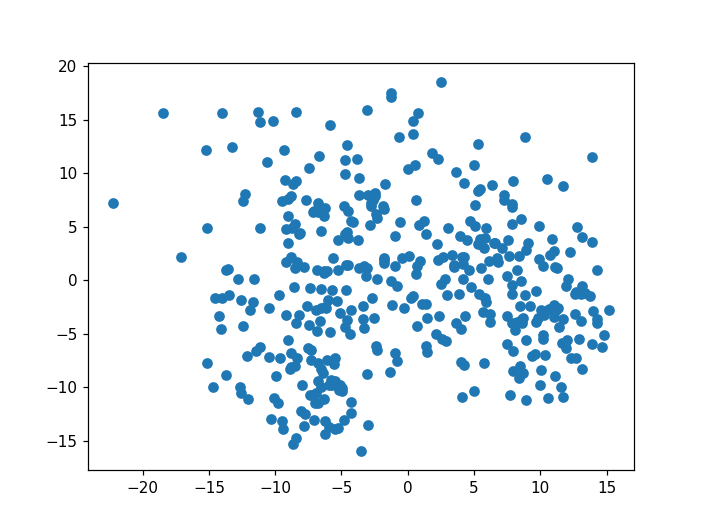

In [64]:
%matplotlib qt
hoverplot(
    dfs[2][0][:400],
    dfs[2][1][:400],
    data[:400],
    zoom=1,
    cmap=None #'gray'
)

In [165]:
kpca = KernelPCA(n_components=2, kernel='rbf')
comp = kpca.fit_transform(scaled_edges)
comp_df = pd.DataFrame(data=comp, columns=['pc1', 'pc2'])
comp_df.head()

,pc1,pc2
0,-0.009310,0.093325
1,-0.018633,0.042961
2,0.078798,0.049105
3,-0.071694,0.052726
4,-0.054769,0.026893


[[ 22 751 544  58 761 794 193 242 609 326]]


<IPython.core.display.Javascript object>


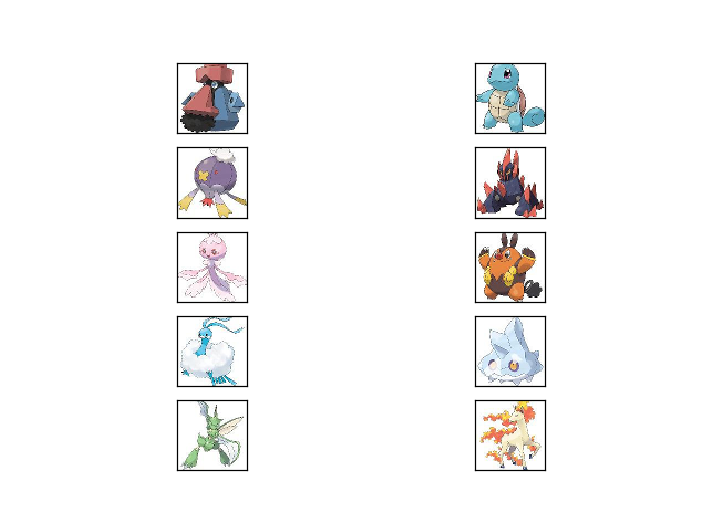

In [175]:
fig = plot_nearest(comp_df.values[22], comp_df.values, data, 10, (5, 2))

In [131]:
def plot_nearest(origin, data, images, n, shape):
    
    nbrs = NearestNeighbors(n_neighbors=n, algorithm='brute').fit(data)
    distances, indices = nbrs.kneighbors(np.atleast_2d(origin))
    
    print(indices)
    
    fig, axes = plt.subplots(shape[0], shape[1])
    axes = axes.flatten()
    
    for i, img in enumerate(images[indices.flatten()]):
        axes[i].imshow(img)
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
        
    return fig

In [120]:
comp_df.values

array([[ 0.01871787, -0.05192159],
       [ 0.08440425, -0.01856554],
       [ 0.01919163, -0.09955551],
       ...,
       [-0.08070956, -0.02113983],
       [-0.17735656,  0.06343731],
       [-0.07562544, -0.16558566]])

In [121]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='brute').fit(comp_df.values)
distances, indices = nbrs.kneighbors(np.atleast_2d(comp_df.values[0]))

[[499 434 196  95 450 466 549  63 370  80]]


<IPython.core.display.Javascript object>


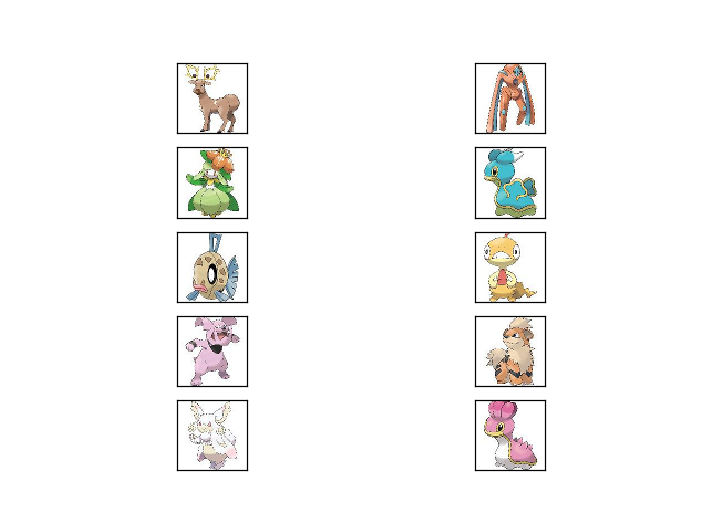

In [179]:
fig = plot_nearest(comp_df.values[499], comp_df.values, data, 10, (5, 2))